Find the qyality of the wine using the machine learning alogrithms


In [2]:
#importing the models
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


read the data

In [3]:
path = os.path.join("..", "data", "winequality-red.csv")

# Read the semicolon-separated file
wine_df = pd.read_csv(path, sep=";")

# Display the first few rows
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.shape

(1599, 12)

Exploratory Data Analysis.(EDAS)

In [5]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

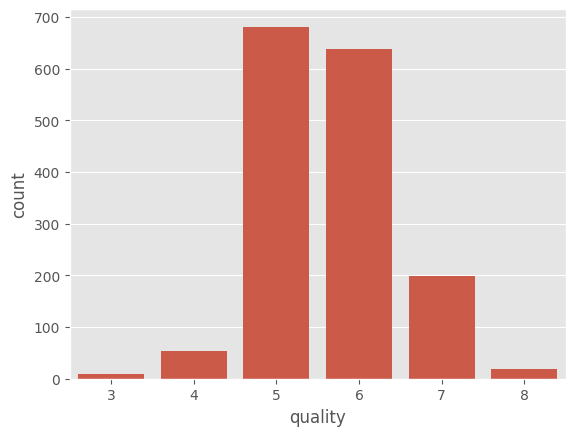

In [8]:
style.use('ggplot')
sns.countplot(x="quality",data=wine_df)

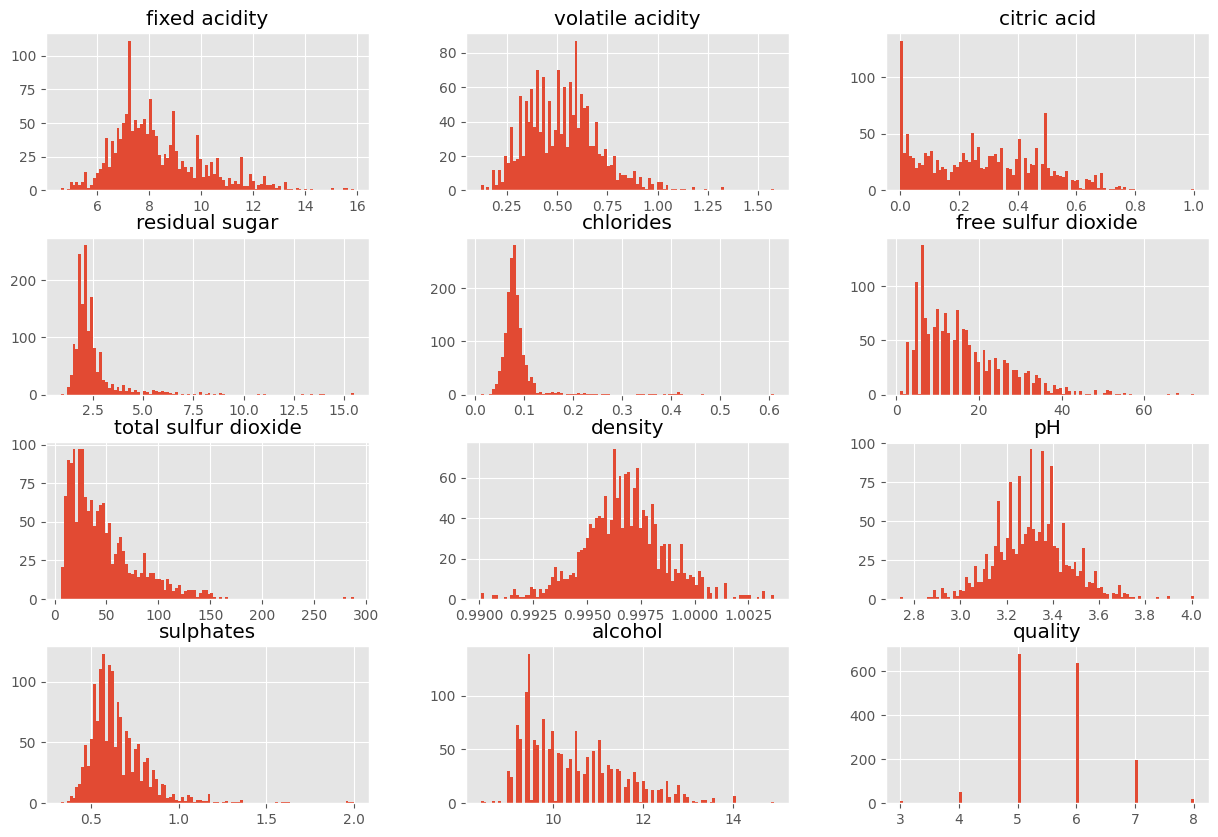

In [9]:
wine_df.hist(bins=100,figsize=(15,10))
plt.show()

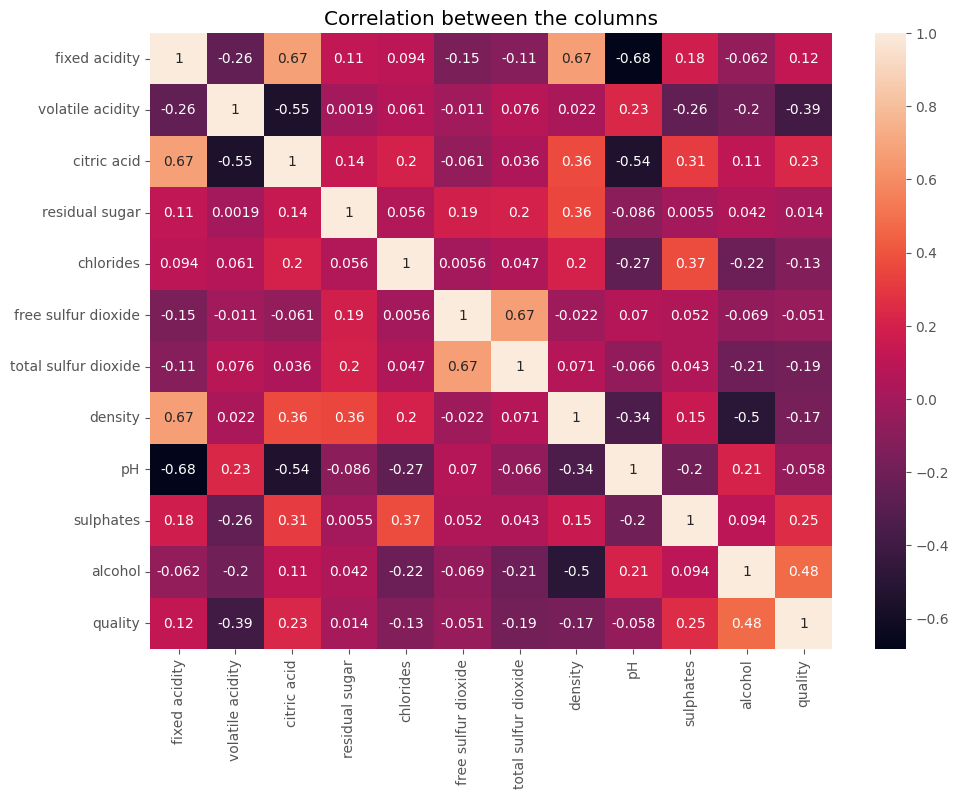

In [10]:
plt.figure(figsize=(11,8))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()
#use for the identify the relation between the every columns

In [11]:
wine_df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='alcohol'>

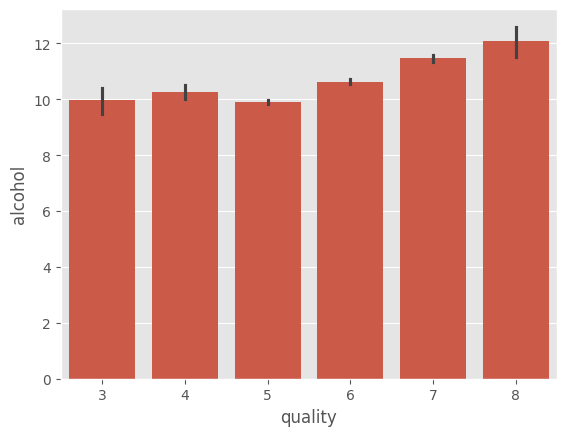

In [12]:
sns.barplot(x=wine_df["quality"],y=wine_df["alcohol"])

In [13]:
wine_df['quality'] = wine_df.quality.apply(lambda x: 1 if x >= 7 else 0)
wine_df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

Separtae the train and test data 

In [14]:
#separate the indepedent and depedent varibles
x=wine_df.drop("quality",axis=1)
y=wine_df["quality"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


Create the model

In [16]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)#train the logastic model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


test the model

In [17]:

log_pred=logmodel.predict(x_test)
print("test accuracy {:2f}%",accuracy_score(log_pred,y_test))

test accuracy {:2f}% 0.890625


In [18]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       276
           1       0.70      0.36      0.48        44

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320



Draw the confusion matrix

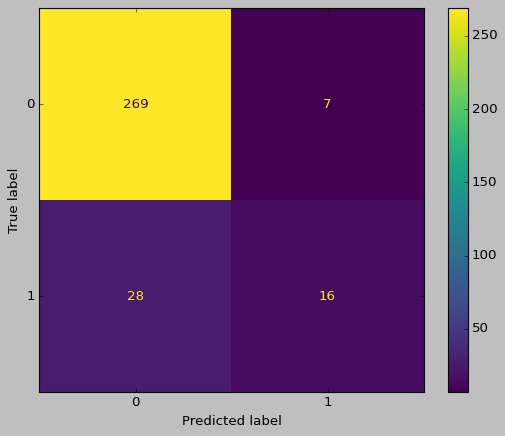

In [19]:
style.use("classic")
cm=confusion_matrix(y_test,log_pred,labels=logmodel.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logmodel.classes_)
disp.plot()
plt.show()


In [20]:
#print the values of confusion matrix
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

TN:  269
FN:  28
TP:  16
FP:  7


Random Forest Model

In [21]:
r_forest=RandomForestClassifier()
r_forest.fit(x_train,y_train)
r_pred=r_forest.predict(x_test)
r_accuracy=r_forest,accuracy_score(r_pred,y_test)
print("accuracy score:{.2f}%",r_accuracy)

accuracy score:{.2f}% (RandomForestClassifier(), 0.925)


In [22]:
print(classification_report(r_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       286
           1       0.61      0.79      0.69        34

    accuracy                           0.93       320
   macro avg       0.79      0.87      0.82       320
weighted avg       0.94      0.93      0.93       320



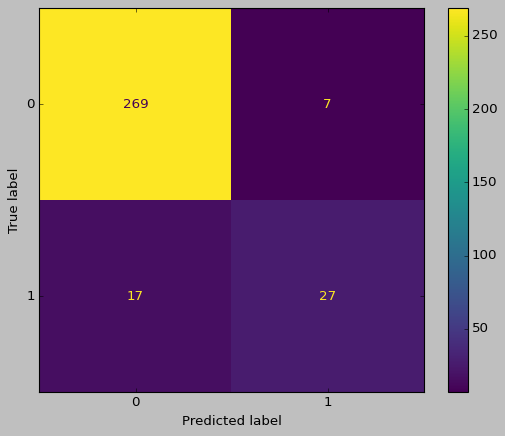

In [23]:
style.use("classic")
cm=confusion_matrix(y_test,r_pred,labels=r_forest.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=r_forest.classes_)
disp.plot()
plt.show()

In [24]:
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

TN:  269
FN:  17
TP:  27
FP:  7


Knn mode


In [25]:
#train the model
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
#test the model
knn_predict=knn_model.predict(x_test)

In [31]:
knn_accuracy=accuracy_score(knn_predict,y_test)
print("knn accuracg:",knn_accuracy)

knn accuracg: 0.865625


draw the confusion matrix

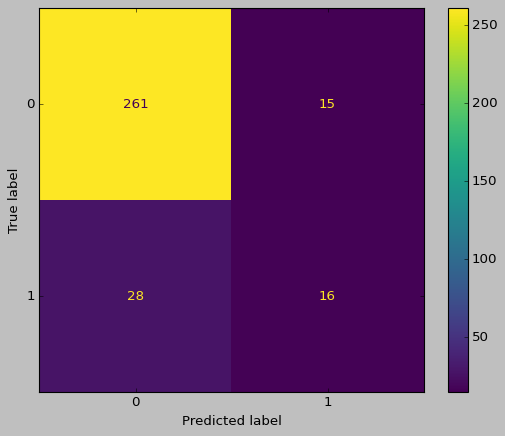

In [32]:
style.use("classic")
cm=confusion_matrix(y_test,knn_predict,labels=logmodel.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logmodel.classes_)
disp.plot()
plt.show()

In [34]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       276
           1       0.52      0.36      0.43        44

    accuracy                           0.87       320
   macro avg       0.71      0.65      0.68       320
weighted avg       0.85      0.87      0.86       320

